In [1]:
#import all the necessary modules
import pandas as pd
pd.options.display.max_columns=None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Let us See how the data looks like

In [2]:
#read the data
df=pd.read_csv(r'pima-indians-diabetes.csv')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
# get a glance of the data.
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


### From the above details we can say that there are many incorrect data present for columns glucose_conc, diastolic_bp, thickness, insulin, bmi, skin. These values can not be zero and hence we need to use some means to use correct data here.

In [4]:
# Let us see the dependent variable class labels. The data here seems like 67% Non Diabetic and rest 33% as diabetic.
df.diabetes.value_counts()

False    500
True     268
Name: diabetes, dtype: int64

#check if any blanks are present in the data 
df.isnull().sum()

### Now that we have a basic knowledge of the data let us see visually if the data is linearly seperable
From the below pairplot we can see that the data is not linearly seperable and hence using a linear model might not give us good accuracy.

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


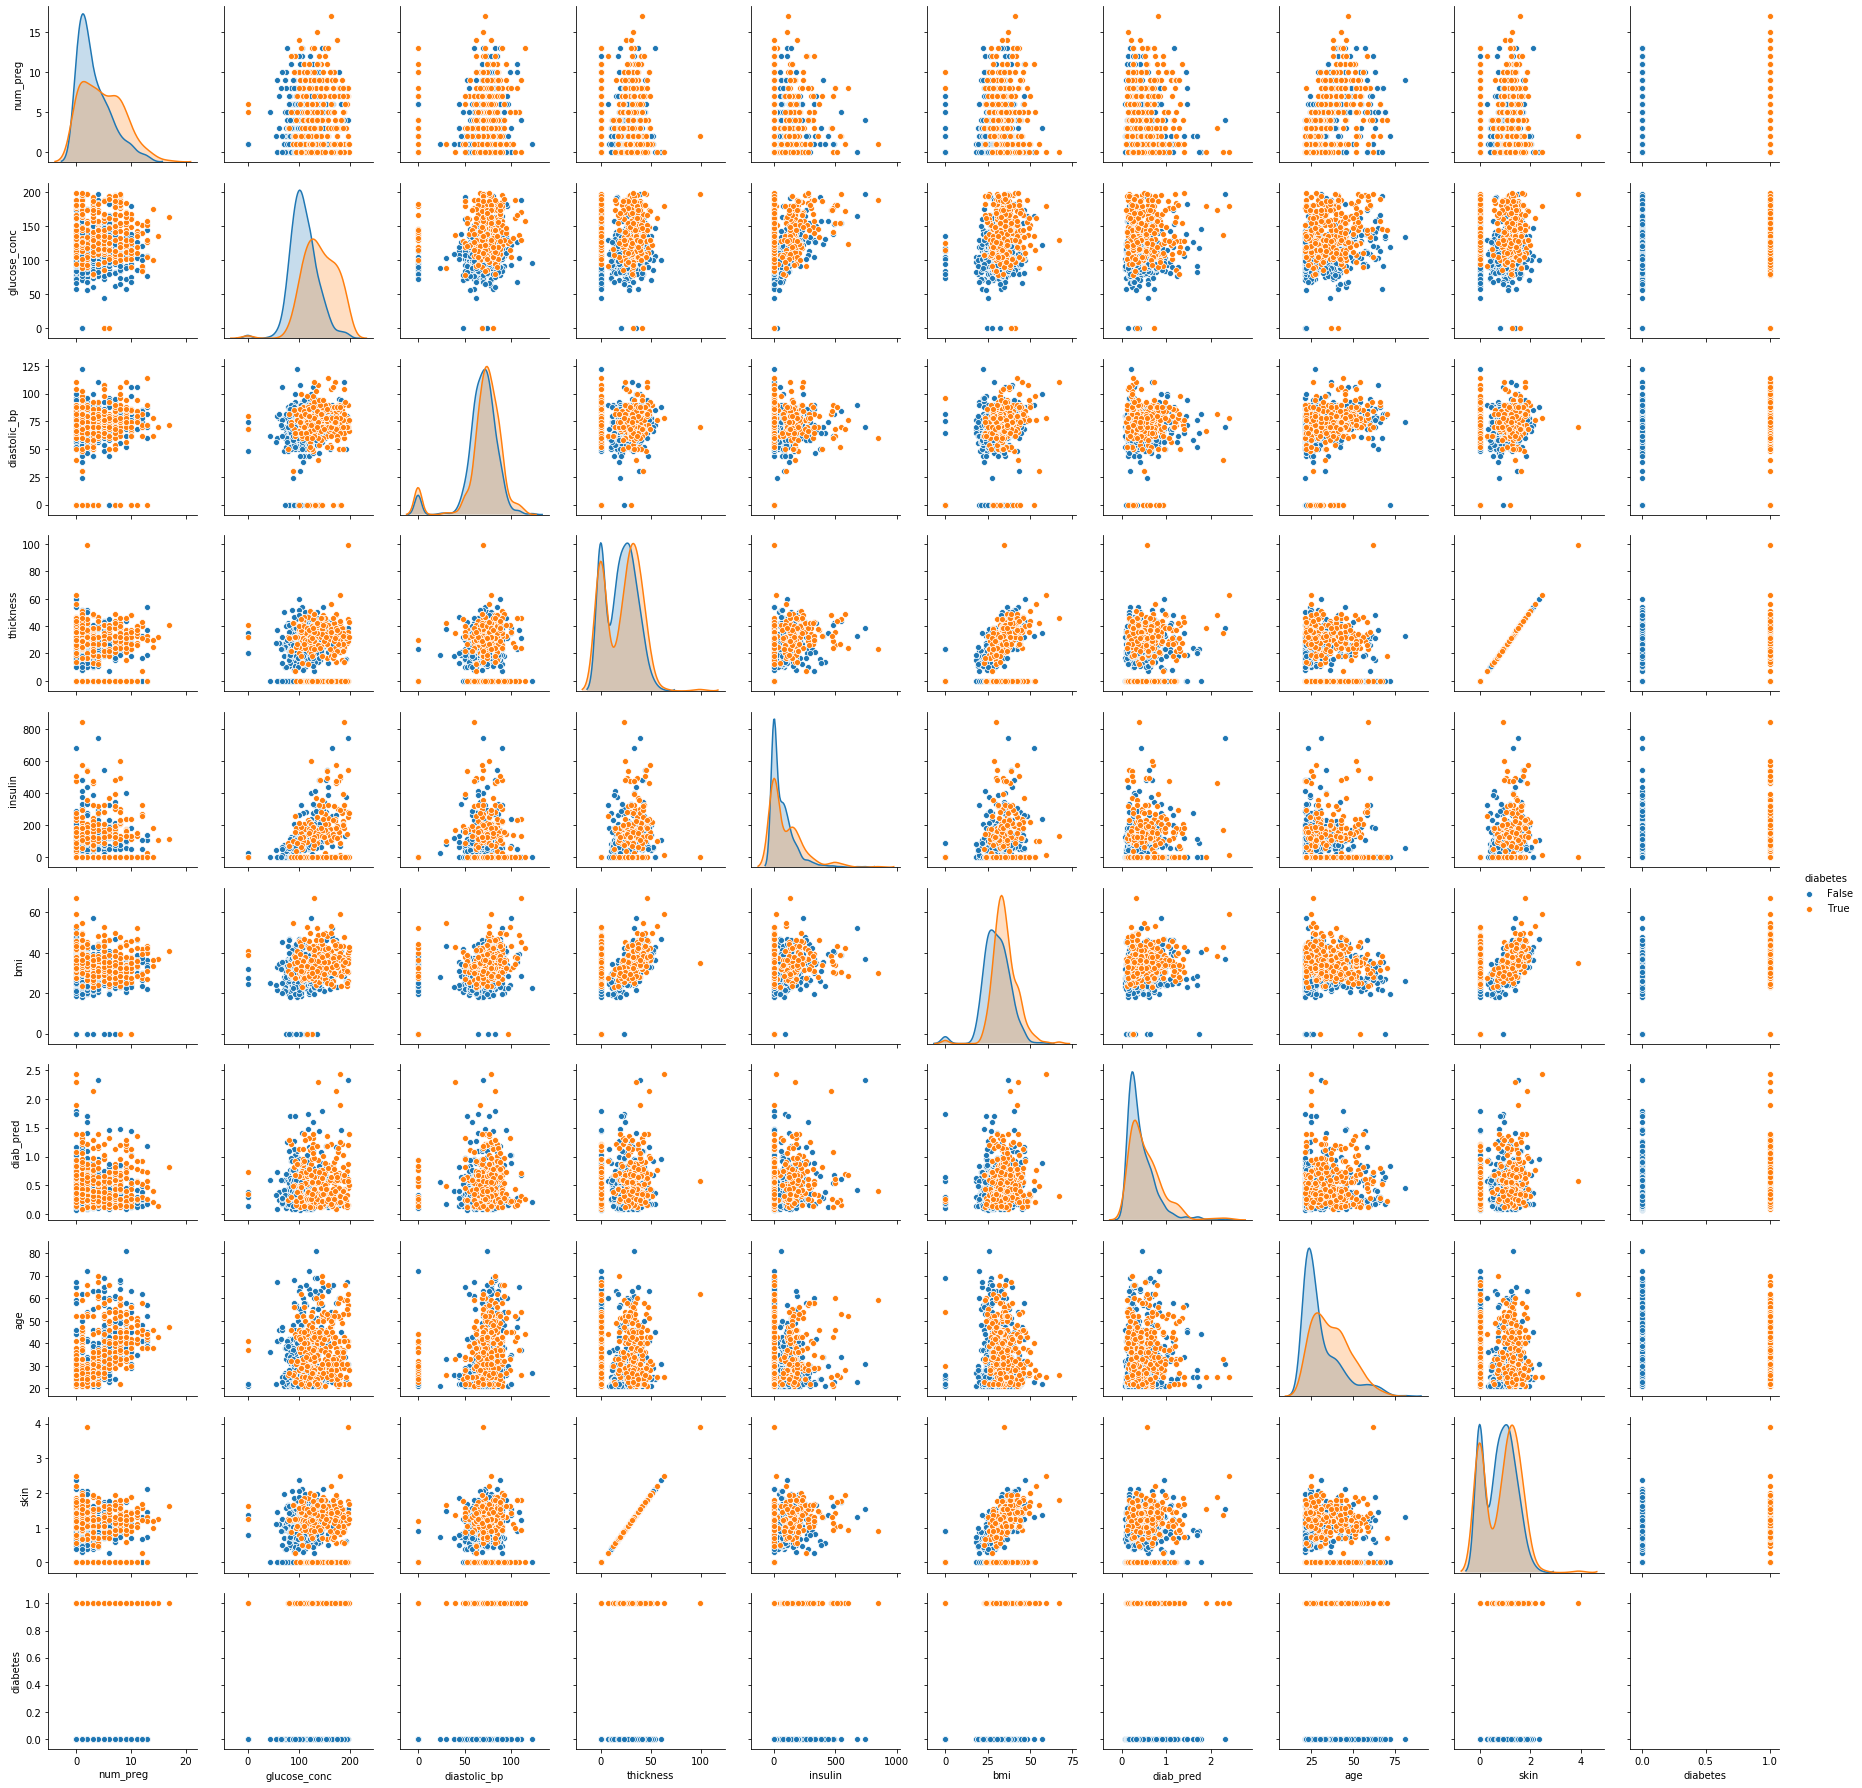

In [5]:

sns.pairplot(df,hue='diabetes')

### Correlation Matrix:
Now that we know how the data is let us see how the columns are correlated to each other. We can either use correlation matrix to see that or use a heatmap to see the correlation.

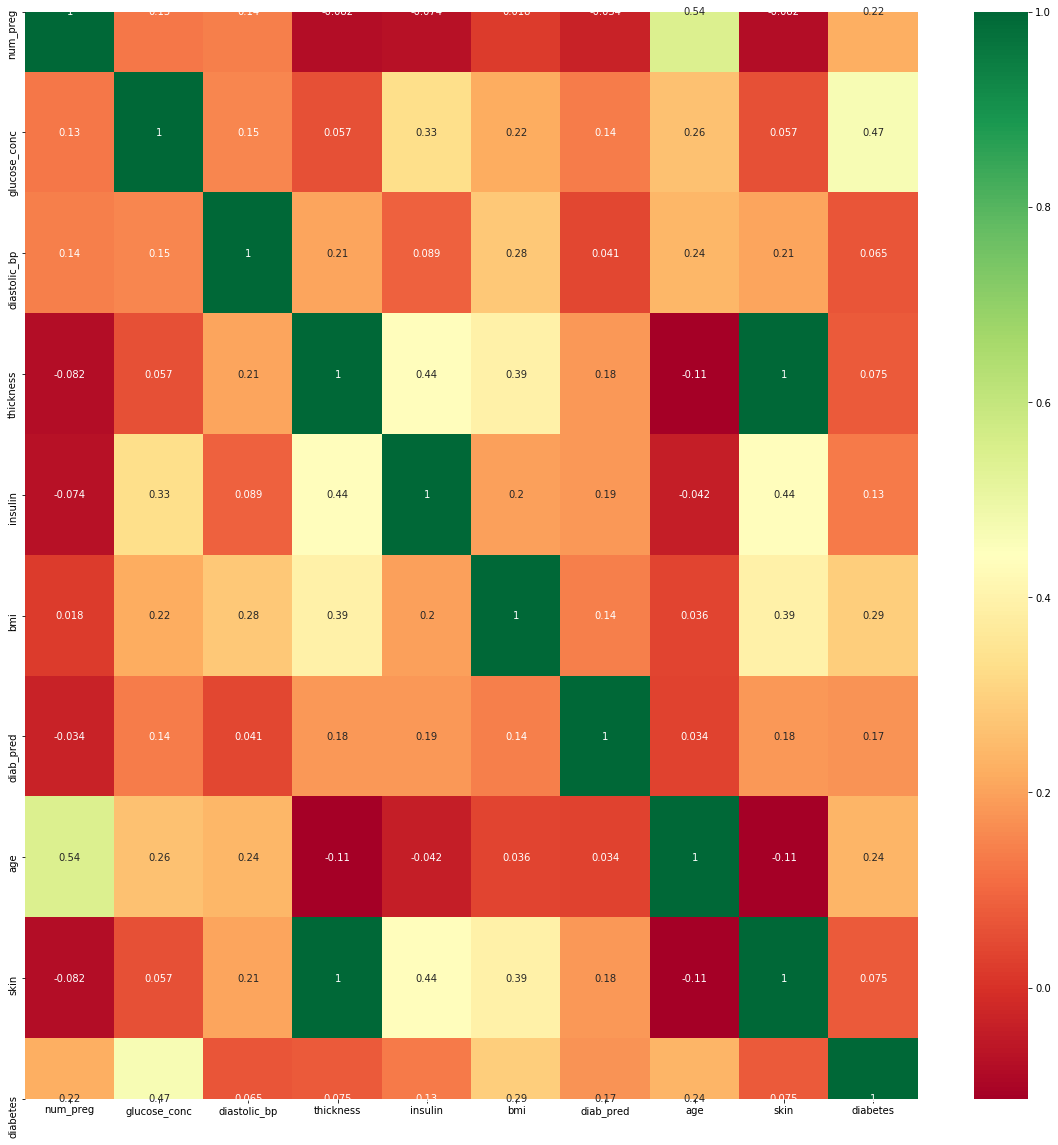

In [6]:
#find the correlation 
corr_mat=df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

### Feature Engineering : Let us engineer the data now so that it can be fed into the model.

In [7]:
#convert the outcome to 0 and 1 from True False
#df['diabetes']=df['diabetes'].apply(lambda x:1 if x==True else 0)
#df.head()

In [8]:
#split the data into x and y
X=df.drop(['diabetes'],axis=1).values
y=df['diabetes'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=32)

### From here we see that almost all the features has minimum value as 0 which is not actually possible in real. let us see how many data points are like this.

In [9]:
for col in df.columns:
    print(f"Zero values for {col} : {df[df[col]==0].shape[0]}")

Zero values for num_preg : 111
Zero values for glucose_conc : 5
Zero values for diastolic_bp : 35
Zero values for thickness : 227
Zero values for insulin : 374
Zero values for bmi : 11
Zero values for diab_pred : 0
Zero values for age : 0
Zero values for skin : 227
Zero values for diabetes : 500


In [10]:
#impute the data and change the incorrect values with their column means
from sklearn.impute import SimpleImputer
fill_values=SimpleImputer(missing_values=0,strategy="mean")
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)
#we will find other processess also using randomforest

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_clf.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [13]:
#checking the feature importance
pd.DataFrame({'Column':df.drop(['diabetes'],axis=1).columns,'Feature Importance':dt_clf.feature_importances_}).sort_values(by=['Feature Importance'],ascending=False)

,Column,Feature Importance
1,glucose_conc,0.289854
5,bmi,0.178345
7,age,0.147389
6,diab_pred,0.083699
0,num_preg,0.082196
4,insulin,0.079649
2,diastolic_bp,0.076312
8,skin,0.055393
3,thickness,0.007162


In [14]:
#predict using decission tree
predicted_val_dt=dt_clf.predict(X_test)
print("Accuracy : ", metrics.accuracy_score(y_test,predicted_val_dt))

Accuracy :  0.70995670995671


In [15]:
# Let us use cross validation and predict the scores.
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt_clf,X_train,y_train.ravel(),cv=10)
print(score)
print("Accuracy : ",score.mean())

[0.72222222 0.7962963  0.62962963 0.7037037  0.61111111 0.7037037
 0.62962963 0.62264151 0.60377358 0.75471698]
Accuracy :  0.6777428371767995


### So we can say that the average accuracy of the model is ~68%